In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#Tensorflow
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.layers import (Dense, Activation, Dropout,BatchNormalization, Input, Conv1D, Conv2D, Flatten,
                             Convolution2D, MaxPool2D, MaxPooling1D, MaxPooling2D)
from tensorflow.keras.callbacks import LearningRateScheduler
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping


#Scikit_learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import (roc_curve, roc_auc_score, auc, log_loss,
                             precision_score, recall_score, f1_score,
                             accuracy_score, classification_report,
                             ConfusionMatrixDisplay, confusion_matrix)
from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
zm_stars1 = pd.read_csv('/content/drive/MyDrive/Data/star_galaxy/ZMs/last/star_45_0.csv')
zm_galaxies1 = pd.read_csv('/content/drive/MyDrive/Data/star_galaxy/ZMs/last/galaxy_45_0.csv')
zm_stars1.drop("Unnamed: 0", axis = 1, inplace = True)
zm_galaxies1.drop("Unnamed: 0", axis = 1, inplace = True)
zms1 = np.array(zm_stars1)
zmg1 = np.array(zm_galaxies1)

all_zm_data = np.concatenate([zmg1,zms1])
len(zmg1), len(zms1), len(all_zm_data)

(780, 545, 1325)

In [ ]:
galaxies_labels = np.zeros(780)
stars_labels = np.ones(545)
all_labels = np.concatenate([galaxies_labels, stars_labels])
len(all_labels)

1325

In [ ]:
X_train_list=[]
y_train_list=[]
X_test_list=[]
y_test_list=[]
models=[]
Y_pred=[]
accs=[]
cons=[]
aucs=[]
fprs=[]
tprs=[]
TP_list = []
FP_list = []
TN_list = []
FN_list = []
test_indx=[]

batch_size = 64
NUM_EPOCH = 30

for i in range (10):
    X_train, X_test, y_train, y_test, train_indices, test_indices = train_test_split(all_zm_data, all_labels, np.arange(len(all_labels)), test_size=0.25, shuffle=True, random_state=None)
    X_train_list.append(X_train)
    y_train_list.append(y_train)
    X_test_list.append(X_test)
    y_test_list.append(y_test)
    test_indx.append(test_indices)

    class_weights = {0: len(all_zm_data) / (2*len(zmg1)), 1: len(all_zm_data) / (2*len(zms1))}
    y_train_encoded = to_categorical(y_train, num_classes=2)

    # input
    x = Input(shape=(1081,1))

    #hidden layers
    c0 = Conv1D(256, kernel_size=3, strides=2, padding="same")(x)
    b0 = BatchNormalization()(c0)
    m0 = MaxPooling1D(pool_size=2)(b0)
    d0 = Dropout(0.1)(m0)

    c1 = Conv1D(128, kernel_size=3, strides=2, padding="same")(d0)
    b1 = BatchNormalization()(c1)
    m1 = MaxPooling1D(pool_size=2)(b1)
    d1 = Dropout(0.1)(m1)

    c2 = Conv1D(64, kernel_size=3, strides=2, padding="same")(d1)
    b2 = BatchNormalization()(c2)
    m2 = MaxPooling1D(pool_size=2)(b2)
    d2 = Dropout(0.1)(m2)

    f = Flatten()(d2)

    de0 = Dense(64, activation='relu')(f)
    de1 = Dense(32, activation='relu')(de0)
    de2 = Dense(2, activation='softmax')(de1)

    model = Model(inputs=x, outputs=de2, name="cnn_zm_45_galaxy_nonegalaxy")
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
    optimizer = tf.keras.optimizers.Adam()
    model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

    # Callback Functions
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

    history = model.fit(
    X_train, y_train_encoded,
    batch_size=batch_size,
    epochs=NUM_EPOCH,
    class_weight=class_weights,
    verbose = 1,
    callbacks=es,
    validation_split=0.1
    )
    models.append(history)

    y_pred = model.predict(X_test)
    y_pred_labels = np.argmax(y_pred, axis=1)
    Y_pred.append(y_pred_labels)

    con0 = metrics.confusion_matrix(y_test, y_pred_labels)
    cons.append(con0)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_labels).ravel()
    TN_list.append(tn)
    FP_list.append(fp)
    FN_list.append(fn)
    TP_list.append(tp)

    acc = metrics.accuracy_score(y_test, y_pred_labels)
    accs.append(acc)

    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_labels)
    fprs.append(fpr)
    tprs.append(tpr)

    auc = metrics.roc_auc_score(y_test, y_pred_labels)
    aucs.append(auc)

Epoch 1/30
14/14 [==============================] - 10s 70ms/step - loss: 0.6499 - accuracy: 0.7088 - val_loss: 4.4980 - val_accuracy: 0.5600
Epoch 2/30
14/14 [==============================] - 0s 21ms/step - loss: 0.4434 - accuracy: 0.8108 - val_loss: 1.9953 - val_accuracy: 0.6800
Epoch 3/30
14/14 [==============================] - 0s 20ms/step - loss: 0.4102 - accuracy: 0.8119 - val_loss: 1.0564 - val_accuracy: 0.7400
Epoch 4/30
14/14 [==============================] - 0s 20ms/step - loss: 0.3713 - accuracy: 0.8331 - val_loss: 0.4429 - val_accuracy: 0.8400
Epoch 5/30
14/14 [==============================] - 0s 20ms/step - loss: 0.3644 - accuracy: 0.8387 - val_loss: 0.4728 - val_accuracy: 0.8300
Epoch 6/30
14/14 [==============================] - 0s 20ms/step - loss: 0.2997 - accuracy: 0.8656 - val_loss: 0.5296 - val_accuracy: 0.8200
Epoch 7/30
14/14 [==============================] - 0s 20ms/step - loss: 0.3276 - accuracy: 0.8656 - val_loss: 0.4056 - val_accuracy: 0.8300
Epoch 8/30
1

In [ ]:
output_el_path = '/content/drive/MyDrive/Data/win_classifier_material'

import os
import pickle
pickle_el_filename = 'Y_pred_cnn_zms_galaxy_nonegalaxy.pickle'
pickle_el_filepath = os.path.join(output_el_path, pickle_el_filename)

with open(pickle_el_filepath, 'wb') as pickle_file:
    pickle.dump(Y_pred, pickle_file)


0.8033132530120481 0.8124242424242424


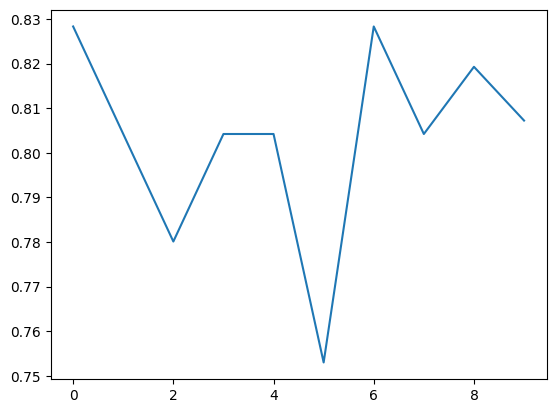

In [ ]:
print(np.mean(accs), np.max(aucs))
plt.plot(accs)


In [ ]:
def metric(tp, fp, fn, tn):
   acu = (tp + tn) / (tp + tn + fn + fp)
   pre_p = tp / (tp + fp)
   pre_n = tn / (tn + fn)
   recal_p = tp / (tp + fn)
   recal_n = tn / (tn + fp)
   f1_p = (2 * (pre_p) * (recal_p)) / ((pre_p) + (recal_p))
   f1_n = (2 * (pre_n) * (recal_n)) / ((pre_n) + (recal_n))
   hss1 = (tp - fp) / (tp + fn)
   hss2 = (2 * ((tp * tn) - (fn * fp))) / (((tp + fn) * (tn + fn)) + ((tp + fp) * (tn + fp)))
   ch = ((tp + fp) * (tp + fn)) / (tp + fn + tn + fp)
   gs = (tp - ch) / (tp + fp + fn - ch)
   tss = (tp / (tp + fn)) - (fp / (fp + tn))
   return acu, pre_p, pre_n, recal_p, recal_n, hss1, tss, f1_p, f1_n, hss2, gs

In [ ]:
acus=[]
pre_ps=[]
pre_ns=[]
recal_ps=[]
recal_ns=[]
hss1s=[]
tsss=[]
f1_ps=[]
f1_ns=[]
hss2s=[]
gss=[]

# Calculate metrics for each set of TP, FP, FN, TN values
performance_metrics = []
for i in range(10):
    acu, pre_p, pre_n, recal_p, recal_n, hss1, tss, f1_p, f1_n, hss2, gs = metric(TP_list[i], FP_list[i], FN_list[i], TN_list[i])
    acus.append(acu)
    pre_ps.append(pre_p)
    pre_ns.append(pre_n)
    recal_ps.append(recal_p)
    recal_ns.append(recal_n)
    hss1s.append(hss1)
    tsss.append(tss)
    f1_ps.append(f1_p)
    f1_ns.append(f1_n)
    hss2s.append(hss2)
    gss.append(gs)

acus_mean = np.mean(acus)
acus_std = np.std(acus)

pre_ps_mean = np.mean(pre_ps)
pre_ps_std = np.std(pre_ps)

pre_ns_mean = np.mean(pre_ns)
pre_ns_std = np.std(pre_ns)

recal_ps_mean = np.mean(recal_ps)
recal_ps_std = np.std(recal_ps)

recal_ns_mean = np.mean(recal_ns)
recal_ns_std = np.std(recal_ns)

hss1s_mean = np.mean(hss1s)
hss1s_std = np.std(hss1s)

tsss_mean = np.mean(tsss)
tsss_std = np.std(tsss)

f1_ps_mean = np.mean(f1_ps)
f1_ps_std = np.std(f1_ps)

f1_ns_mean = np.mean(f1_ns)
f1_ns_std = np.std(f1_ns)

hss2s_mean = np.mean(hss2s)
hss2s_std = np.std(hss2s)

gss_mean = np.mean(gss)
gss_std = np.std(gss)

auc_mean = np.mean(aucs)
auc_std = np.std(aucs)

In [ ]:
print("Mean and Standard Deviation Values:")
print("Accuracy - Mean:", acus_mean, "  Std:", acus_std)
print("Precision Positive - Mean:", pre_ps_mean, "  Std:", pre_ps_std)
print("Precision Negative - Mean:", pre_ns_mean, "  Std:", pre_ns_std)
print("F1 Positive - Mean:", f1_ps_mean, "  Std:", f1_ps_std)
print("F1 Negative - Mean:", f1_ns_mean, "  Std:", f1_ns_std)
print("Recall Positive - Mean:", recal_ps_mean, "  Std:", recal_ps_std)
print("Recall Negative - Mean:", recal_ns_mean, "  Std:", recal_ns_std)
print("HSS1 - Mean:", hss1s_mean, "  Std:", hss1s_std)
print("HSS2 - Mean:", hss2s_mean, "  Std:", hss2s_std)
print("GS - Mean:", gss_mean, "  Std:", gss_std)
print("TSS - Mean:", tsss_mean, "  Std:", tsss_std)
print("AUC - Mean:", auc_mean, "  Std:", auc_std)

Mean and Standard Deviation Values:
Accuracy - Mean: 0.7966867469879518   Std: 0.019438798554533194
Precision Positive - Mean: 0.780888432046009   Std: 0.05092928381753128
Precision Negative - Mean: 0.8092537025928485   Std: 0.02840525519417016
F1 Positive - Mean: 0.738011861842513   Std: 0.03161873544797666
F1 Negative - Mean: 0.8330290528585191   Std: 0.017416677127944164
Recall Positive - Mean: 0.7046436391563984   Std: 0.05745175013858132
Recall Negative - Mean: 0.8606788483560097   Std: 0.04219808958436212
HSS1 - Mean: 0.500938166414297   Std: 0.05899212776539112
HSS2 - Mean: 0.5726953809324177   Std: 0.042321394380272714
GS - Mean: 0.40247805371626566   Std: 0.04167891726496278
TSS - Mean: 0.565322487512408   Std: 0.04339749956092341
AUC - Mean: 0.7826612437562039   Std: 0.021698749780461685


In [ ]:
output_el_path = '/content/drive/MyDrive/Data/star_galaxy'
import os
import pickle

pickle_el_filename = 'fprs_cnn_zms_galaxy_nonegalaxy.pickle'
pickle_el_filepath = os.path.join(output_el_path, pickle_el_filename)

with open(pickle_el_filepath, 'wb') as pickle_file:
    pickle.dump(fprs, pickle_file)


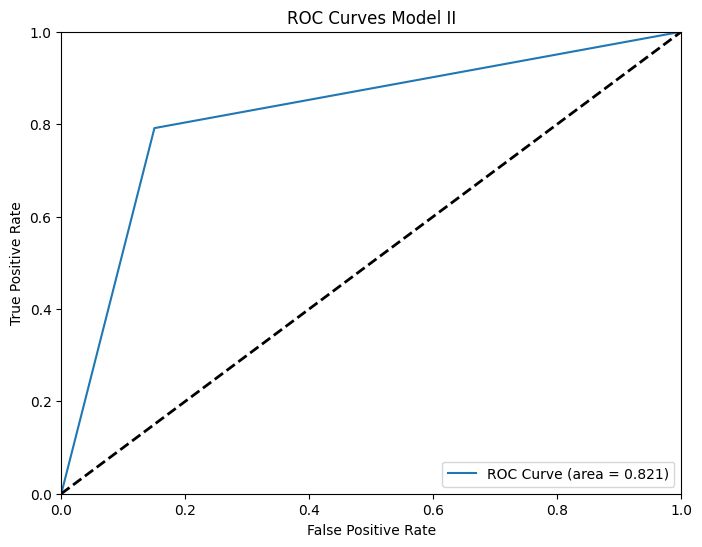

In [ ]:
class_names = ['Galaxy', 'None-Galaxy']

plt.figure(figsize=(8, 6))

plt.plot(fprs[4], tprs[4], lw=1.5, label='ROC Curve (area = {:.3f})'.format(aucs[4]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Model II')
plt.legend(loc="lower right")
plt.savefig("/content/drive/MyDrive/Data/star_galaxy/figs/roc_cnn_zms_1.eps", format="eps")
plt.show()


In [ ]:
import pickle
Pkl_Filename = "/content/drive/MyDrive/Data/star_galaxy/best_models/best_cnn_zms_galaxy_star_acc84_tss60.sav"
with open(Pkl_Filename, 'wb') as file:
    pickle.dump(models[9], file)

#### Define and fit the CNN model

In [ ]:
batch_size = 32
NUM_EPOCH = 10

# input
x = Input(shape=(903,1))

#hidden layers
c0 = Conv1D(8, kernel_size=3, strides=2, padding="same")(x)
b0 = BatchNormalization()(c0)
m0 = MaxPooling1D(pool_size=2)(b0)
d0 = Dropout(0.1)(m0)

c1 = Conv1D(16, kernel_size=3, strides=2, padding="same")(d0)
b1 = BatchNormalization()(c1)
m1 = MaxPooling1D(pool_size=2)(b1)
d1 = Dropout(0.1)(m1)

c2 = Conv1D(32, kernel_size=3, strides=2, padding="same")(d1)
b2 = BatchNormalization()(c2)
m2 = MaxPooling1D(pool_size=2)(b2)
d2 = Dropout(0.1)(m2)

f = Flatten()(d2)

de0 = Dense(64, activation='relu')(f)
de1 = Dense(32, activation='relu')(de0)
de2 = Dense(2, activation='softmax')(de1)

model = Model(inputs=x, outputs=de2, name="cnn_zm_41_star_galaxy")
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam()
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train_encoded, batch_size=batch_size, epochs=NUM_EPOCH, callbacks=saver)

Model: "cnn_zm_41_star_galaxy"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_38 (InputLayer)       [(None, 903, 1)]          0         
                                                                 
 conv1d_111 (Conv1D)         (None, 452, 8)            32        
                                                                 
 batch_normalization_111 (B  (None, 452, 8)            32        
 atchNormalization)                                              
                                                                 
 max_pooling1d_111 (MaxPool  (None, 226, 8)            0         
 ing1D)                                                          
                                                                 
 dropout_111 (Dropout)       (None, 226, 8)            0         
                                                                 
 conv1d_112 (Conv1D)         (None, 113, 16) 

40/40 [==============================] - 4s 17ms/step - loss: 0.5627 - accuracy: 0.7266
Epoch 2/10
38/40 [===========================>..] - ETA: 0s - loss: 0.4709 - accuracy: 0.7837

40/40 [==============================] - 1s 16ms/step - loss: 0.4734 - accuracy: 0.7838
Epoch 3/10
40/40 [==============================] - ETA: 0s - loss: 0.4534 - accuracy: 0.8060

40/40 [==============================] - 1s 17ms/step - loss: 0.4534 - accuracy: 0.8060
Epoch 4/10
40/40 [==============================] - ETA: 0s - loss: 0.4109 - accuracy: 0.8307

40/40 [==============================] - 1s 17ms/step - loss: 0.4109 - accuracy: 0.8307
Epoch 5/10
39/40 [============================>.] - ETA: 0s - loss: 0.4049 - accuracy: 0.8229

40/40 [==============================] - 1s 16ms/step - loss: 0.4050 - accuracy: 0.8219
Epoch 6/10
38/40 [===========================>..] - ETA: 0s - loss: 0.4005 - accuracy: 0.8265

40/40 [==============================] - 1s 17ms/step - loss: 0.4004 - accuracy: 0.8283
Epoch 7/10
38/40 [===========================>..] - ETA: 0s - loss: 0.3817 - accuracy: 0.8462

40/40 [==============================] - 1s 17ms/step - loss: 0.3821 - accuracy: 0.8458
Epoch 8/10
40/40 [==============================] - ETA: 0s - loss: 0.3663 - accuracy: 0.8339

40/40 [==============================] - 1s 17ms/step - loss: 0.3663 - accuracy: 0.8339
Epoch 9/10
38/40 [===========================>..] - ETA: 0s - loss: 0.3430 - accuracy: 0.8512

40/40 [==============================] - 1s 25ms/step - loss: 0.3433 - accuracy: 0.8498
Epoch 10/10
39/40 [============================>.] - ETA: 0s - loss: 0.3357 - accuracy: 0.8606

40/40 [==============================] - 1s 25ms/step - loss: 0.3380 - accuracy: 0.8593


In [ ]:
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_labels)

3/3 [==============================] - 0s 7ms/step


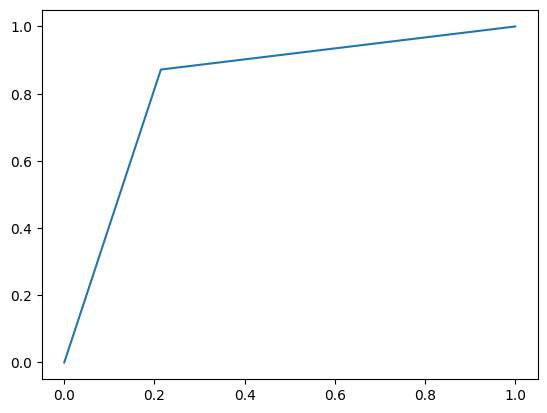

In [ ]:
plt.plot(fpr,tpr)
plt.show()

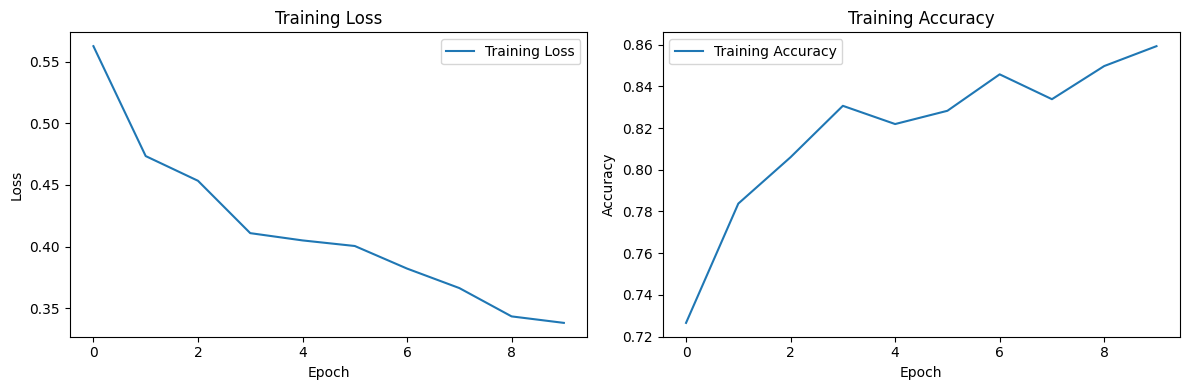

In [ ]:

import matplotlib.pyplot as plt
import json

# Define the function to plot training history
def plot_training(history):
    plt.figure(figsize=(12, 4))

    # Plot training loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.legend()

    # Plot training accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


plot_training(history)
plt.show()

In [ ]:
y_test_encoded = to_categorical(y_test, num_classes=2)
con0 = confusion_matrix(np.argmax(y_test_encoded, axis=1), y_pred_labels)
tn, fp, fn, tp=confusion_matrix(y_test, y_pred_labels).ravel()
tss = (tp / (tp + fn)) - (fp / (fp + tn))
acc=accuracy_score(y_test, y_pred_labels)
print(con0,acc,tss)

[[22  6]
 [ 5 34]] 0.835820895522388 0.6575091575091575


In [ ]:
classification_metrics = classification_report(y_pred_labels, y_test)
print(classification_metrics)

              precision    recall  f1-score   support

           0       0.46      0.73      0.57        41
           1       0.94      0.84      0.89       219

    accuracy                           0.82       260
   macro avg       0.70      0.79      0.73       260
weighted avg       0.87      0.82      0.84       260



In [ ]:
fp = []
tp = []
for j in range(10, 100, 15):
    j /= 100  # Convert j back to its original floating-point value
    batch_size = 32
    NUM_EPOCH = 10


    all_data = np.concatenate([zm1, zm2])
    all_labels = np.concatenate([stars_labels, galaxies_labels])

    X_train, X_test, y_train, y_test = train_test_split(all_data, all_labels, test_size=j)

    X_test = X_test.reshape((X_test.shape[0], 903, 1))
    y_train_encoded = to_categorical(y_train, num_classes=2)
    y_test_encoded = to_categorical(y_test, num_classes=2)

    history = model.fit(X_train, y_train_encoded, batch_size=batch_size, epochs=NUM_EPOCH, callbacks=[lr_scheduler])
    y_pred = model.predict(X_test)

    y_pred_labels = np.argmax(y_pred, axis=1)

    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_labels)
    fp.append(fpr)
    tp.append(tpr)

Epoch 1/10
30/30 [==============================] - 1s 20ms/step - loss: 7.0796 - accuracy: 0.9947 - lr: 0.0010
Epoch 2/10
30/30 [==============================] - 1s 18ms/step - loss: 13.7992 - accuracy: 0.9925 - lr: 0.0010
Epoch 3/10
30/30 [==============================] - 1s 17ms/step - loss: 99.0619 - accuracy: 0.9423 - lr: 0.0010
Epoch 4/10
30/30 [==============================] - 1s 17ms/step - loss: 35.1299 - accuracy: 0.9722 - lr: 0.0010
Epoch 5/10
30/30 [==============================] - 1s 17ms/step - loss: 44.0822 - accuracy: 0.9551 - lr: 0.0010
Epoch 6/10
30/30 [==============================] - 1s 30ms/step - loss: 12.0765 - accuracy: 0.9872 - lr: 0.0010
Epoch 7/10
30/30 [==============================] - 1s 29ms/step - loss: 1.0611 - accuracy: 0.9968 - lr: 1.0000e-04
Epoch 8/10
30/30 [==============================] - 1s 30ms/step - loss: 0.1592 - accuracy: 0.9989 - lr: 1.0000e-04
Epoch 9/10
30/30 [==============================] - 1s 30ms/step - loss: 0.0000e+00 - accur

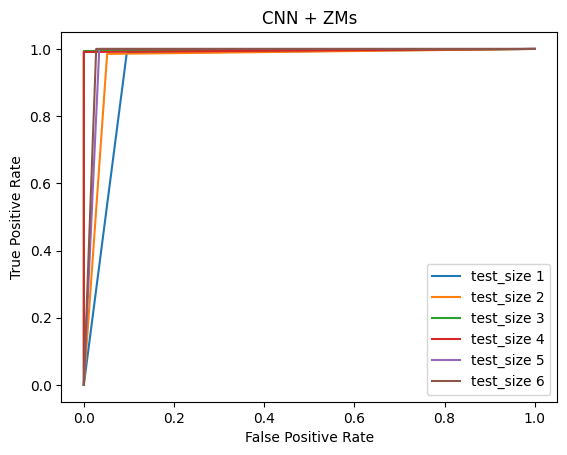

In [ ]:
for i in range(len(fp)):
    plt.plot(fp[i], tp[i], label=f'test_size {i+1}')

plt.title('CNN + ZMs')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()


In [ ]:
batch_size = 32
NUM_EPOCH = 10
all_data = np.concatenate([zm1, zm2])
all_labels = np.concatenate([stars_labels, galaxies_labels])
X_train, X_test, y_train, y_test = train_test_split(all_data, all_labels, test_size=0.15)
# X_train = X_train.reshape((X_train.shape[0], 903, 1))
X_test = X_test.reshape((X_test.shape[0], 903, 1))
y_train_encoded = to_categorical(y_train, num_classes=2)
y_test_encoded = to_categorical(y_test, num_classes=2)
history = model.fit(X_train, y_train_encoded, batch_size=batch_size, epochs=NUM_EPOCH, callbacks=[lr_scheduler])
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

Epoch 1/10
28/28 [==============================] - 1s 22ms/step - loss: 46.6529 - accuracy: 0.9615 - lr: 0.0010
Epoch 2/10
28/28 [==============================] - 1s 21ms/step - loss: 38.9657 - accuracy: 0.9638 - lr: 0.0010
Epoch 3/10
28/28 [==============================] - 0s 18ms/step - loss: 45.8518 - accuracy: 0.9570 - lr: 0.0010
Epoch 4/10
28/28 [==============================] - 1s 21ms/step - loss: 33.3786 - accuracy: 0.9695 - lr: 0.0010
Epoch 5/10
28/28 [==============================] - 0s 16ms/step - loss: 25.9462 - accuracy: 0.9717 - lr: 0.0010
Epoch 6/10
28/28 [==============================] - 0s 16ms/step - loss: 25.2460 - accuracy: 0.9808 - lr: 0.0010
Epoch 7/10
28/28 [==============================] - 0s 12ms/step - loss: 8.8486 - accuracy: 0.9910 - lr: 1.0000e-04
Epoch 8/10
28/28 [==============================] - 0s 10ms/step - loss: 1.6097 - accuracy: 0.9955 - lr: 1.0000e-04
Epoch 9/10
28/28 [==============================] - 0s 10ms/step - loss: 0.3198 - accuracy

In [ ]:
len(X_train)

884

In [ ]:
con0 = confusion_matrix(np.argmax(y_test_encoded, axis=1), y_pred_labels)
tp = con0[0,0]
fn = con0[0,1]
fp = con0[1,0]
tn = con0[1,1]
tss = (tp/(tp+fn))-(fp/(fp+tn))
print(tss)

0.8804280716196747


In [ ]:
classification_metrics = classification_report(y_pred_labels, y_test)
print(classification_metrics)

5/5 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        42
           1       0.97      0.96      0.97       114

    accuracy                           0.96       156
   macro avg       0.94      0.95      0.94       156
weighted avg       0.96      0.96      0.96       156



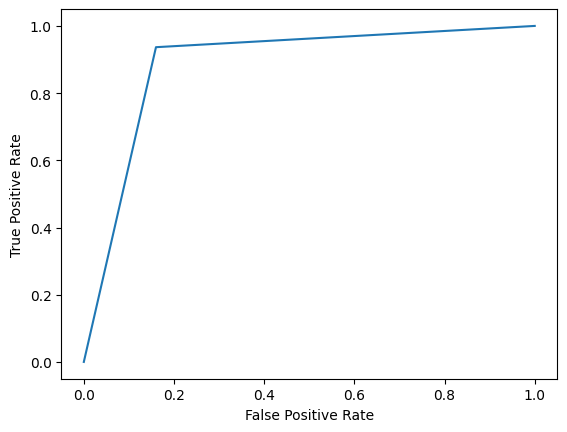

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_labels)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
auc = metrics.roc_auc_score(y_test, y_pred_labels)
print(auc)

0.8883544303797469


In [ ]:
print(y_pred_labels - y_test)

[-1.  0.  0.  0.  1.  0. -1.  0.  0. -1.  0.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0. -1. -1.  0.  0.  0.  0.  0.  0.  0.  0. -1.
  0.  1.  0.  0.  0.  0. -1.  0.  0.  0.  0. -1.  0.  1.  0.  1.  0.  0.
  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1. -1.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  1.  0.  0.  0. -1.
  0. -1.  0.  0. -1.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  0.  0.  0.  0.  0.  0.  0.  0. -1.  1.  0.  0.  0. -1. -1.  0.  0.
 -1.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0. -1.  0.  0.  0.  0.  0. -1.
 -1.  1.  1.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0. -1.  0.  0.
  1.  0.  0.  0. -1.  0. -1.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.
  1.  0.  0.  0.  0.  0.  1.  0.  0.  0. -1.  0.  0.  1.  0.  0.  0.  0.
 -1.  0.  0.  0.  0. -1.  0. -1.  0. -1.  0.  0. -1.  0.  0.  0.  0.  0.
  0. -1.  1.  0.  0.  0.  0.  0. -1. -1. -1.  0.  0

In [ ]:
batch_size = 32
NUM_EPOCH = 10

pred_list = []
con = []
tsss = []

for j in range(10, 98, 15):
    j /= 100  # Convert j back to its original floating-point value

    # Uncomment the lines below if necessary
    # L1 = np.random.randint(0, len(zm1), 260)
    # L2 = np.random.randint(0, len(zm2), 780)

    all_data = np.concatenate([zm1, zm2])
    all_labels = np.concatenate([stars_labels, galaxies_labels])

    X_train, X_test, y_train, y_test = train_test_split(all_data, all_labels, test_size=j)
    X_train = X_train.reshape((X_train.shape[0], 903, 1))
    X_test = X_test.reshape((X_test.shape[0], 903, 1))

    y_train_encoded = to_categorical(y_train, num_classes=2)
    y_test_encoded = to_categorical(y_test, num_classes=2)

    history = model.fit(X_train, y_train_encoded, batch_size=batch_size, epochs=NUM_EPOCH, callbacks=[lr_scheduler])
    y_pred = model.predict(X_test)
    y_pred_labels = np.argmax(y_pred, axis=1)
    pred_list.append(y_pred_labels)
    con0 = confusion_matrix(np.argmax(y_test_encoded, axis=1), y_pred_labels)
    con.append(con0)
    tp = con0[0, 0]
    fn = con0[0, 1]
    fp = con0[1, 0]
    tn = con0[1, 1]
    tss = (tp / (tp + fn)) - (fp / (fp + tn))
    tsss.append(tss)

Epoch 1/10
30/30 [==============================] - 0s 10ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - lr: 0.0010
Epoch 2/10
30/30 [==============================] - 0s 9ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - lr: 0.0010
Epoch 3/10
30/30 [==============================] - 0s 9ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - lr: 0.0010
Epoch 4/10
30/30 [==============================] - 0s 10ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - lr: 0.0010
Epoch 5/10
30/30 [==============================] - 0s 10ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - lr: 0.0010
Epoch 6/10
30/30 [==============================] - 0s 9ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - lr: 0.0010
Epoch 7/10
30/30 [==============================] - 0s 10ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - lr: 1.0000e-04
Epoch 8/10
30/30 [==============================] - 0s 10ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - lr: 1.0000e-04
Epoch 9/10
30/30 [==============================] - 0s 9ms/step - l

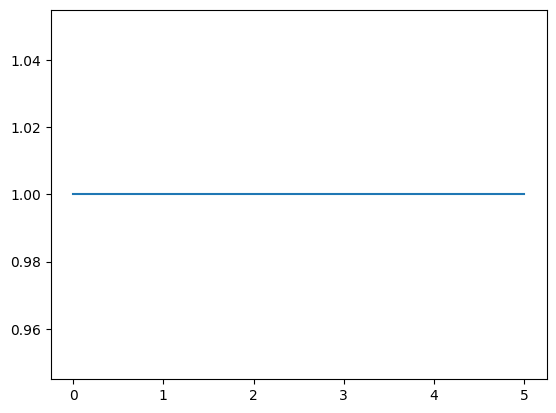

In [ ]:
plt.plot(tsss)

In [ ]:
print(con[2])

[[29  3]
 [ 0 72]]


In [ ]:
mean_tss = np.mean(tsss)
std_tss = np.std(tsss)
print(mean_tss, std_tss)

0.9812076591798866 0.07840064545054198


In [ ]:
tp = con0[0,0]
fn = con0[0,1]
fp = con0[1,0]
tn = con0[1,1]
tss = (tp/(tp+fn))-(fp/(fp+tn))

#### Performance and test the model

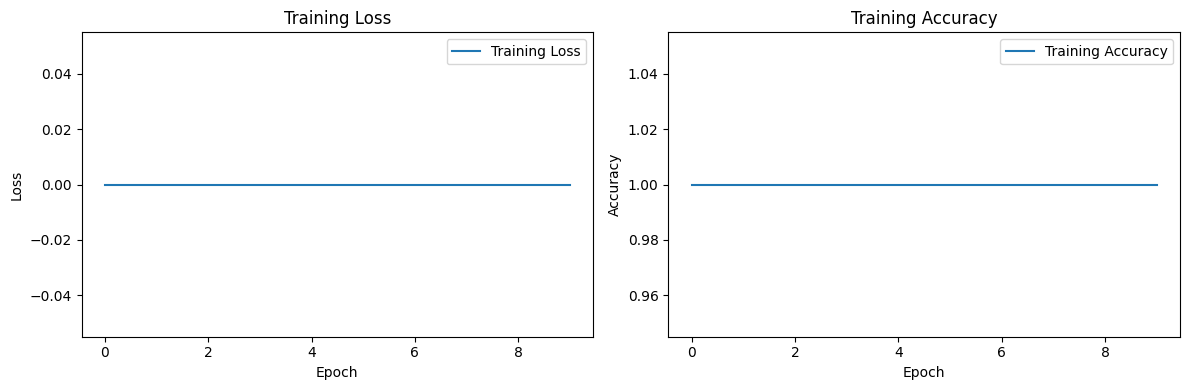

In [ ]:
import matplotlib.pyplot as plt
import json

# Define the function to plot training history
def plot_training(history):
    plt.figure(figsize=(12, 4))

    # Plot training loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.legend()

    # Plot training accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


plot_training(history)
plt.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
classification_metrics = classification_report(y_pred_labels, y_test)
print(classification_metrics)

28/28 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       223
           1       1.00      1.00      1.00       661

    accuracy                           1.00       884
   macro avg       1.00      1.00      1.00       884
weighted avg       1.00      1.00      1.00       884



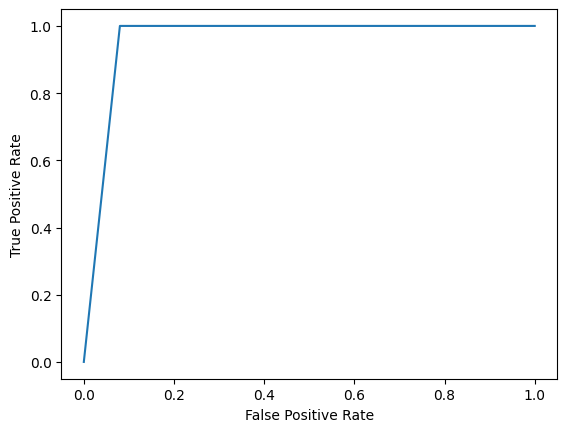

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_labels)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
auc = metrics.roc_auc_score(y_test, y_pred_labels)
print(auc)

0.9600000000000001


In [ ]:
con0 = confusion_matrix(np.argmax(y_test_encoded, axis=1), y_pred_labels)
accuracy = accuracy_score(np.argmax(y_test_encoded, axis=1), y_pred_labels)

print(classification_metrics)
print("Confusion Matrix:\n", con0)
print("Accuracy:", accuracy)


In [ ]:
con0 = confusion_matrix(np.argmax(y_test_encoded, axis=1), y_pred_labels)
accuracy = accuracy_score(np.argmax(y_test_encoded, axis=1), y_pred_labels)
print(con0, accuracy)

[[28  2]
 [ 2 29]] 0.9344262295081968
